In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn .model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib notebook



In [2]:
df = pd.read_csv("cars.csv")




In [3]:
def summary(df):
    for x in df.columns:
        print('Columns Name:',x)
        print('Unique Vlaues:' , df[x].unique())
        print('Unique Vlaues Count:', df[x].value_counts())
    

In [4]:
summary(df)

Columns Name: buying
Unique Vlaues: ['vhigh' 'high' 'med' 'low']
Unique Vlaues Count: buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Columns Name: maint
Unique Vlaues: ['vhigh' 'high' 'med' 'low']
Unique Vlaues Count: maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Columns Name: doors
Unique Vlaues: ['2' '3' '4' '5more']
Unique Vlaues Count: doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
Columns Name: persons
Unique Vlaues: ['2' '4' 'more']
Unique Vlaues Count: persons
2       576
4       576
more    576
Name: count, dtype: int64
Columns Name: lug_boot
Unique Vlaues: ['small' 'med' 'big']
Unique Vlaues Count: lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
Columns Name: safety
Unique Vlaues: ['low' 'med' 'high']
Unique Vlaues Count: safety
low     576
med     576
high    576
Name: count, dtype: int64
Columns Name: class
Unique Vlaues: ['unacc' 'acc' '

In [5]:
map1 = {'vhigh' : 4, 'high' :3 , 'med' : 2 , 'low' : 1}
map2 = {'2' : 2, '3' : 3, '4' : 4 ,'5more' : 5 , 'more' : 5 }
map3 = {'small' : 1 ,'med' : 2 , 'big' : 3}
map4 = {'low' : 1 , 'med' : 2 , 'high' : 3}
map5 = {'unacc' : 0 , 'acc' : 1 , 'vgood' : 2,'good' : 3}

In [6]:
df['buying'] =  df['buying'].map(map1)
df['maint']  =  df['maint'].map(map1)
df['doors']  =  df['doors'].map(map2)
df['persons']=  df['persons'].map(map2)
df['lug_boot'] = df['lug_boot'].map(map3)
df['safety']   = df['safety'].map(map4)
df['class']    =  df['class'].map(map5)

In [7]:
#df.to_csv('preview.csv')

In [8]:
summary(df)

Columns Name: buying
Unique Vlaues: [4 3 2 1]
Unique Vlaues Count: buying
4    432
3    432
2    432
1    432
Name: count, dtype: int64
Columns Name: maint
Unique Vlaues: [4 3 2 1]
Unique Vlaues Count: maint
4    432
3    432
2    432
1    432
Name: count, dtype: int64
Columns Name: doors
Unique Vlaues: [2 3 4 5]
Unique Vlaues Count: doors
2    432
3    432
4    432
5    432
Name: count, dtype: int64
Columns Name: persons
Unique Vlaues: [2 4 5]
Unique Vlaues Count: persons
2    576
4    576
5    576
Name: count, dtype: int64
Columns Name: lug_boot
Unique Vlaues: [1 2 3]
Unique Vlaues Count: lug_boot
1    576
2    576
3    576
Name: count, dtype: int64
Columns Name: safety
Unique Vlaues: [1 2 3]
Unique Vlaues Count: safety
1    576
2    576
3    576
Name: count, dtype: int64
Columns Name: class
Unique Vlaues: [0 1 2 3]
Unique Vlaues Count: class
0    1210
1     384
3      69
2      65
Name: count, dtype: int64


In [9]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [11]:
model_rf =  RandomForestClassifier()

parameter_grid_rf =  {'n_estimators' : [25,50,75,100],
                     'criterion' : ['gini','entropy', 'log_loss'],
                     'max_features' : ['sqrt',None],
                     'bootstrap' : [True, False],
                      'class_weight' : ['balanced',None]}

grid_search_rf =  GridSearchCV(estimator = model_rf,param_grid =  parameter_grid_rf , scoring =  'f1_macro', verbose = 4, cv = 5, refit = True ) 

grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=25;, score=0.966 total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=25;, score=0.882 total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=25;, score=0.922 total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=25;, score=0.937 total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=25;, score=0.983 total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=50;, score=0.968 total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=50;, score=0.894 total

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=25;, score=0.927 total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=25;, score=0.997 total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=50;, score=0.968 total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=50;, score=0.938 total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=50;, score=0.977 total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=50;, score=0.958 total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=50;, score=0.995 total time=   0.0s
[CV 1/5] END bootstrap=True

[CV 1/5] END bootstrap=True, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=50;, score=0.918 total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=50;, score=0.930 total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=50;, score=0.899 total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=50;, score=0.976 total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=50;, score=0.954 total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=75;, score=0.928 total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=75;, score=0.891 total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=None, criterion=gini, max_features

[CV 3/5] END bootstrap=True, class_weight=None, criterion=entropy, max_features=None, n_estimators=50;, score=0.995 total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=None, criterion=entropy, max_features=None, n_estimators=50;, score=0.964 total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=None, criterion=entropy, max_features=None, n_estimators=50;, score=0.992 total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=None, criterion=entropy, max_features=None, n_estimators=75;, score=0.968 total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=None, criterion=entropy, max_features=None, n_estimators=75;, score=0.935 total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=None, criterion=entropy, max_features=None, n_estimators=75;, score=0.979 total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=None, criterion=entropy, max_features=None, n_estimators=75;, score=0.967 total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=None, criteri

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=75;, score=0.971 total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=75;, score=0.948 total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=75;, score=0.962 total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=75;, score=0.955 total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=75;, score=0.980 total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=100;, score=0.982 total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=100;, score=0.937 total time=   0.1s
[CV 3/5] END bootstrap=False, class_wei

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=75;, score=0.947 total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=75;, score=0.955 total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=75;, score=0.968 total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=75;, score=0.937 total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=75;, score=0.950 total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=100;, score=0.947 total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_features=None, n_estimators=100;, score=0.906 total time=   0.1s
[CV 3/5] END boots

[CV 2/5] END bootstrap=False, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=75;, score=0.959 total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=75;, score=0.936 total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=75;, score=0.958 total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=75;, score=0.983 total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=100;, score=0.969 total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=100;, score=0.913 total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=None, criterion=gini, max_features=sqrt, n_estimators=100;, score=0.879 total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=None, criterion=gini, m

[CV 3/5] END bootstrap=False, class_weight=None, criterion=entropy, max_features=None, n_estimators=75;, score=0.979 total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=None, criterion=entropy, max_features=None, n_estimators=75;, score=0.964 total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=None, criterion=entropy, max_features=None, n_estimators=75;, score=0.963 total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=None, criterion=entropy, max_features=None, n_estimators=100;, score=0.968 total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=None, criterion=entropy, max_features=None, n_estimators=100;, score=0.948 total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=None, criterion=entropy, max_features=None, n_estimators=100;, score=0.974 total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=None, criterion=entropy, max_features=None, n_estimators=100;, score=0.961 total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=N

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', None],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='f1_macro', verbose=4)

In [12]:
grid_search_results_rf = pd.DataFrame(grid_search_rf.cv_results_)

In [13]:
grid_search_results_rf.sort_values(by = 'mean_test_score').to_csv('result_rf.csv')


In [14]:
accuracy_score_rf1 = []
accuracy_score_rf2 = []
n_estimators =  range(50,151,5)
for n in n_estimators:
    model1_rf =  RandomForestClassifier(n_estimators =  n , bootstrap =  True , class_weight = 'balanced')
    model1_rf.fit(X_train,y_train)
    accuracy_rf1 =  model1_rf.score(X_test,y_test)
    accuracy_score_rf1.append(accuracy_rf1)
    
for n in n_estimators:
    model2_rf =  RandomForestClassifier(n_estimators =  n , bootstrap =  True , class_weight = 'balanced', max_features =  None)
    model2_rf.fit(X_train,y_train)
    accuracy_rf2 =  model2_rf.score(X_test,y_test)
    accuracy_score_rf2.append(accuracy_rf2)
    

model_rf.fit(X_train,y_train)
model_rf.score(X_test,y_test)




0.9826589595375722

<IPython.core.display.Javascript object>


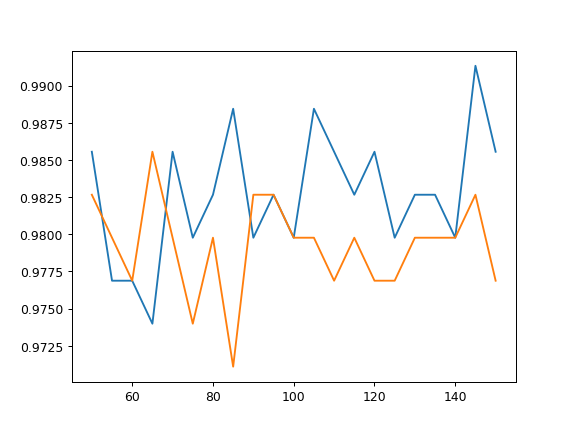

In [15]:
plt.plot(n_estimators,accuracy_score_rf1)
plt.plot(n_estimators,accuracy_score_rf2)

<IPython.core.display.Javascript object>


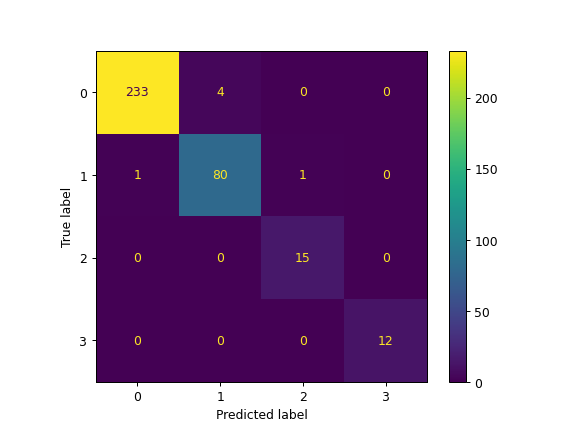

In [16]:
y_pred_model =  model_rf.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_model,labels = [0, 1, 2, 3]) ).plot()

In [22]:
model_gbc =  GradientBoostingClassifier( )

parameter_grid_gbc =  {'max_depth' :  [3,7,10], n_estimators = [100,200,300], learning_rate = [0.1,0.01,1]  }

grid_search_gbc =  GridSearchCV(estimator = model_gbc , param_grid = parameter_grid_gbc , scoring =  'accuracy' , refit = True , verbose = 4, cv = 5)   

grid_search_gbc.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.783 total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.827 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.797 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.837 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.822 total time=   0.5s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.917 total time=   1.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.899 total time=   1.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.902 total time=   1.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.931 total time=   1.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.9

[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=300;, score=0.978 total time=   6.5s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=300;, score=0.968 total time=   5.2s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=300;, score=0.982 total time=   4.5s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=300;, score=0.989 total time=   5.8s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=300;, score=0.993 total time=   5.5s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.888 total time=   0.5s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.866 total time=   0.5s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.272 total time=   0.5s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.855 total time=   0.5s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.989 total time=   0.6s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 7, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=4)

In [30]:
grid_search_gbc.cv_results_
grid_search_gbc_results_gbc = pd.DataFrame(grid_search_gbc.cv_results_).sort_values(by = 'mean_test_score')

In [34]:
grid_search_gbc_results_gbc.to_csv('result_gbc_Iteration 1.csv')

<IPython.core.display.Javascript object>


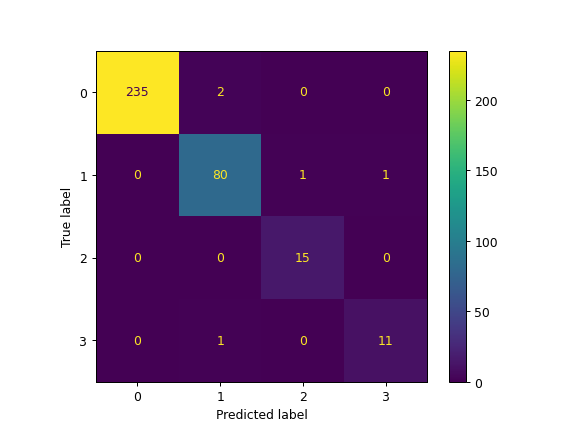

<IPython.core.display.Javascript object>


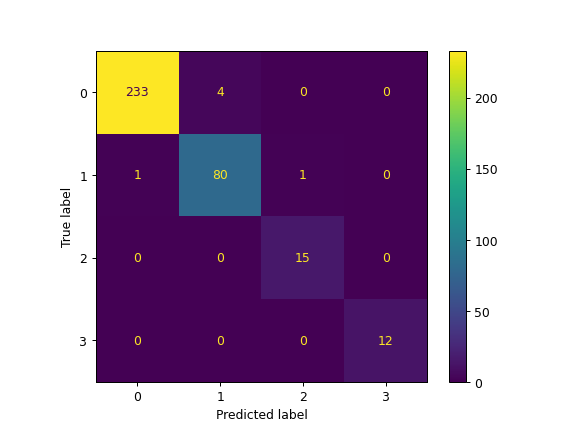

0.9855491329479769

In [60]:
model1_gbc = GradientBoostingClassifier( max_depth =  7 , n_estimators = 100 , learning_rate = 0.1 )
model1_gbc.fit(X_train,y_train)
y_pred_model_gbc = model1_gbc.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_model_gbc,labels = [0, 1, 2, 3]) ).plot()
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_model,labels = [0, 1, 2, 3]) ).plot()
model1_gbc.score(X_test,y_test)

## In this case both the classfiers have high accuracy but we will choose the random forest as it has less miss classfication for class 0 (unacceptable) . As we do not want any car which is acceptable being classified as not acceptable.